# Length of stay in the ICU

This document shows how Jupyter Notebooks can be used to create a reproducible analysis using MIMIC-III. Let's calculate the median length of stay in the ICU and then include this value in our Notebook.

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
%matplotlib inline
plt.style.use('ggplot') 

In [9]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [10]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [11]:
# Get length of stay from the icustays table
query = \
"""
SELECT i.subject_id, i.hadm_id, i.los
FROM icustays i;
"""

data = pd.read_sql_query(query,con)

In [12]:
# Display the first few rows of the data
data.head()

,subject_id,hadm_id,los
0,268,110404,3.2490
1,269,106296,3.2788
2,270,188028,2.8939
3,271,173727,2.0600
4,272,164716,1.6202


In [13]:
# Compute the median LOS
avg_los = data.los.median()
print(avg_los)

2.09225


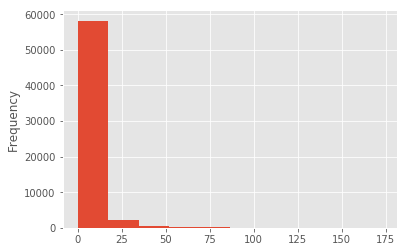

In [14]:
# Plot the distribution
data.los.plot(kind='hist')